# Psychoinformatics - Week 10 (Exercises)
by 徐舒庭 (b11705018@ntu.edu.tw)

In [28]:
import warnings, numpy as np
import xgboost
from matplotlib.pyplot import *
%matplotlib inline
warnings.simplefilter('ignore', DeprecationWarning)
from sklearn import *
from sklearn import datasets
from sklearn import ensemble
from sklearn import model_selection
from sklearn import tree
import copy

# 1 執行並觀察以下的機器學習結果 (2分)

## 1.0 IRIS dataset & Ensemble model function

In [29]:
iris = datasets.load_iris()
X=iris.data
Y=iris.target

In [30]:
np.random.seed(0)
sss=model_selection.StratifiedShuffleSplit(n_splits=5,test_size=0.1)
def EnsembleModels(og_model, Max_n_estimators):
    accs=[] # mean cross-validation accuracies of the models w/ different n_estimators from 1..Max_n_estimators
    for n in range(1,Max_n_estimators+1):  
        print(n,end=' ') # showing progress
        acc=[] # cross-validation accuracies of the ensemble model w/ n_estimators=n
        for train_index, test_index in sss.split(X, Y): # 5-fold cross-validation of one ensemble model
            X_train, X_test = X[train_index], X[test_index]
            Y_train, Y_test = Y[train_index], Y[test_index]
            model=copy.deepcopy(og_model) # to avoid possible model re-training
            model.n_estimators=n
            model.fit(X_train[:,0:2],Y_train) #training
            acc.append(model.predict(X_test[:,0:2])==Y_test) 
        accs.append(np.mean(acc)) # aggregating mean cross-validation accuracies across all the ensemble models
    return(accs)

## 1.1 Bagging (Bootstrap Aggregating)

### 1.1.1 Tree max_depth = 1

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

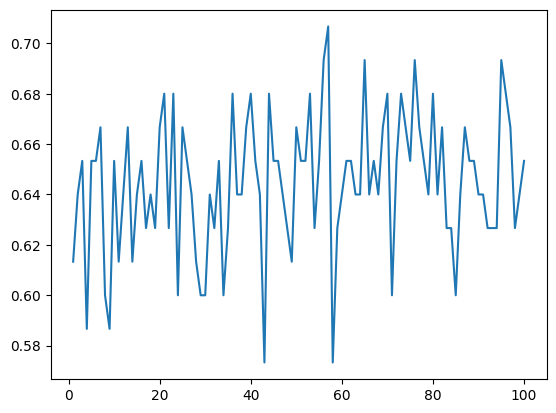

In [39]:
model=ensemble.BaggingClassifier(tree.DecisionTreeClassifier(max_depth=1))
plot(range(1,101),EnsembleModels(model,100));

### 1.1.2 Tree max_depth = 3

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

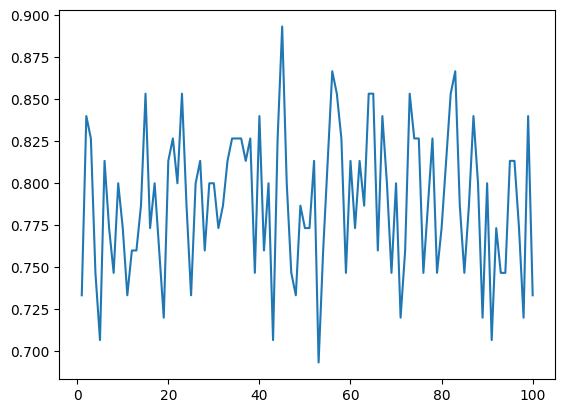

In [32]:
model=ensemble.BaggingClassifier(tree.DecisionTreeClassifier(max_depth=3))
plot(range(1,101),EnsembleModels(model,100));

## 1.2 Boosting

### 1.2.1 AdaBoost

#### 1.2.1.1 Tree max_depth = 1

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

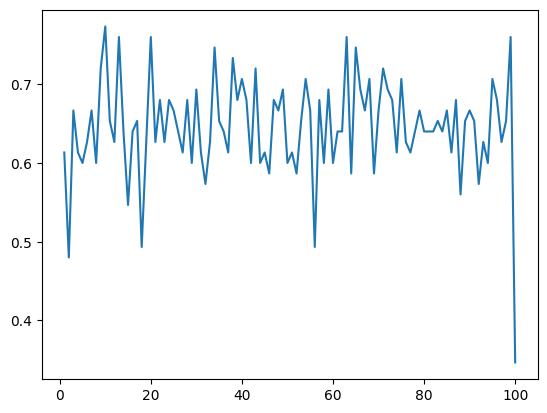

In [33]:
model=ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=1))
plot(range(1,101),EnsembleModels(model,100));

#### 1.2.1.2 Tree max_depth = 3

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

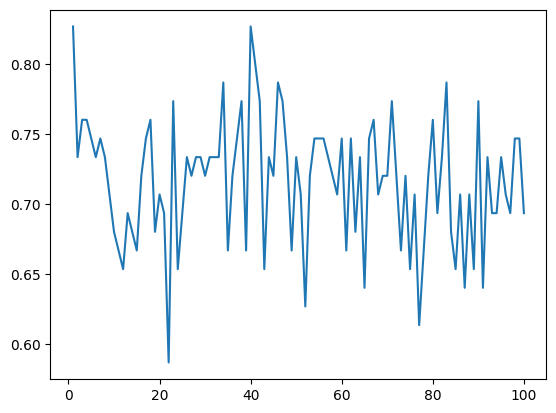

In [34]:
model=ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=3))
plot(range(1,101),EnsembleModels(model,100));

### 1.2.2 Gradient Boosting

The following two implementations are conceptually identical but XGBoost is more resource-efficient and can be parallelized/distributed.

#### 1.2.2.1 Scikit-learn's Gradient Tree Boosting

##### 1.2.2.1.1 Tree max_depth = 1

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

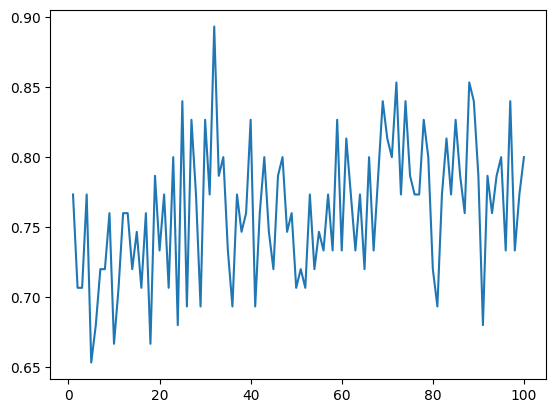

In [35]:
model=ensemble.GradientBoostingClassifier(max_depth=1)
plot(range(1,101),EnsembleModels(model,100));

##### 1.2.2.1.2 Tree max_depth = 3

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

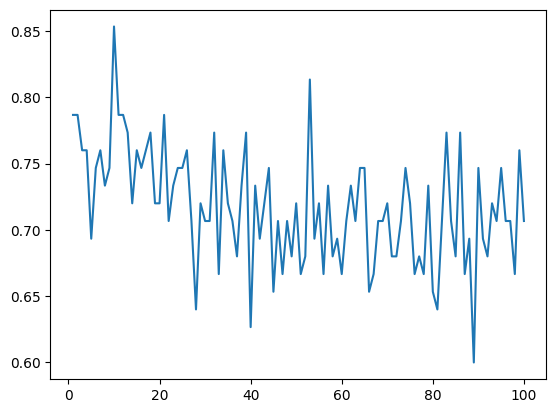

In [36]:
model=ensemble.GradientBoostingClassifier(max_depth=3)
plot(range(1,101),EnsembleModels(model,100));

#### 1.2.2.2 XGBoost (eXtreme Gradient Boosting)

##### 1.2.2.2.1 Tree max_depth = 1

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

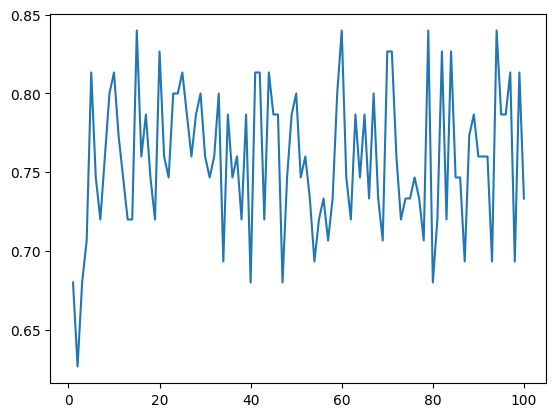

In [37]:
model=xgboost.XGBClassifier(max_depth=1)
plot(range(1,101),EnsembleModels(model,100));

##### 1.2.2.2.2 Tree max_depth = 3

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

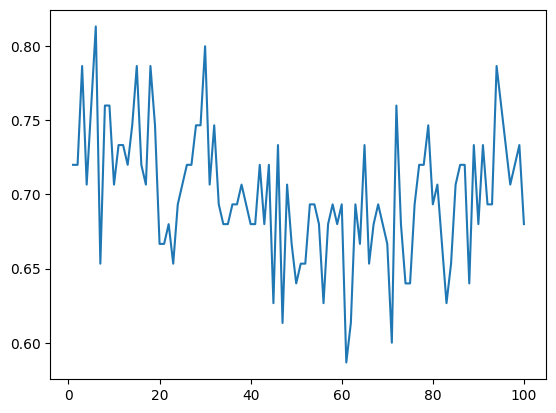

In [38]:
model=xgboost.XGBClassifier(max_depth=3)
plot(range(1,101),EnsembleModels(model,100));

# 2 根據以上的觀察回答以下的問題 (6 分)

## 2.1 在Bagging時, 1.1.2中複雜模型的正確率是否比1.1.1簡單模型的正確率好或差? 為什麼 (2分)

1.1.2中複雜模型的正確率較好。
因為在簡單模型中，DecisionTreeCassifier的max_depth設置為1，代表每個decision tree只能進行一次分割，導致模型複雜度較低，且只能針對一個特徵進行分析，這會使訓練數據的擬合不夠充分，導致訓練集表現較差，正確率下降。

## 2.2 在Boosting時, 1.2.1.2/1.2.2.1.2/1.2.2.2.2中複雜模型的正確率是否比1.2.1.1/1.2.2.1.1/1.2.2.2.1中相對應的簡單模型正確率好或差? 為什麼 (2分)

在1.2.1.2中複雜模型的正確率較1.2.1.1中的簡單模型好，但在1.2.2.1.2和1.2.2.2.2中，複雜模型的正確率都較1.2.2.1.1和1.2.2.2.1中想對應的簡單模型差。
在1.2.1中，使用的是ADaBoosting，複雜模型的正確率較簡單模型好，可能是因為複雜模型能夠更好地捕捉複雜的模式和結構，並且Adaboosting對其進行加權。這提高了對先前模型中未能解釋的樣本的擬合。
在1.2.2中，使用的是Gradient Boosting，複雜模型的正確率不一定較簡單模型好，可能是因為梯度提升是基於梯度的優化，並且每個新模型訓練的目標是減小先前模型的殘差。如果複雜模型對於殘差的擬合效果不佳，這可能導致性能差於簡單模型。

## 2.3 為何只有Boosting在簡單模型時(1.2.1.1/1.2.2.1.1/1.2.2.2.1)，正確率大致上會隨著n_estimators數目變多而增加，但Bagging和複雜的Boosting模型卻不是如此? (2分)

這種現象可能與Bagging和Boosting在訓練方式上的差異有關：
1. **Bagging：**
   - 當n_estimators達到一定數量後，Bagging已經充分發揮穩定性。進一步增加基本模型的數量可能不會讓模型正確率更高，因為已經形成了一個相對穩定的集成模型。
   - 增加n_estimators可能增加過度擬合的風險，尤其是當基本模型相對複雜時。過度擬合可能導致在訓練集之外的數據表現下降。

2. **Boosting：**
   - 當基本模型是簡單模型時（深度為1的決策樹），增加基本模型的數量可能有助於更好地擬合訓練數據中的細微模式和結構。
   - 如果基本模型已經是相對複雜的模型（深度較大的決策樹），進一步增加基本模型的數量可能導致過度擬合。複雜的模型在訓練集上的表現可能較好，但在測試集上的泛化能力下降，因為模型可能過度擬合了訓練數據中的噪聲和局部特徵。
   - 對於複雜的Boosting模型，增加基本模型的數量可能使整體模型更複雜，導致過度擬合的風險增加，因此正確率在某個點之後可能不再提高。